## Серов С.С. ИУ5-22 РК1

# Задание

Для заданного набора данных проведите обработку пропусков в данных. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему? Для заданного набора данных произведите масштабирование данных и преобразование категориальных признаков в количественные. Какие методы Вы использовали для решения задачи и почему?

Набор данных:   [kaggle.com (Marvel)](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-comic-characters-dataset)


# Описание набора данных

In [92]:
from google.colab import files
# files.upload()

!ls -lha kaggle.json

!pip install -q kaggle


!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets list

!kaggle datasets download -d fivethirtyeight/fivethirtyeight-comic-characters-dataset

-rw-r--r-- 1 root root 68 Apr  3 16:26 kaggle.json
ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)  729MB  2020-03-27 23:46:53          41093  
ryanxjhan/cbc-news-coronavirus-articles-march-26               CBC News Coronavirus/COVID-19 Articles (NLP)          6MB  2020-03-27 23:23:07            245  
vitaliymalcev/russian-passenger-air-service-20072020           Russian passenger air service 2007-2020             239KB  2020-04-02 22:27:03            158  
danevans/world-bank-wdi-212-health-systems                     World Bank WDI 2.12 - Health Systems                  6KB  2020-03-29 19:00:14            3

In [93]:
# !unzip /content/fivethirtyeight-comic-characters-dataset.zip
!head marvel-wikia-data.csv

673702,Yologarch (Earth-616),\/Yologarch_(Earth-616),,Bad Characters,,,,,Living Characters,,,

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
%matplotlib inline 

data = pd.read_csv('marvel-wikia-data.csv', sep=",")
# data = pd.get_dummies(data)
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [95]:
data.shape

(16376, 13)

In [96]:
# Список колонок с типами данных
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [97]:
# Количество пустых значений
data.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [98]:
# Основные статистические характеристки набора данных
data.describe()

,page_id,APPEARANCES,Year
count,16376.000000,15280.000000,15561.000000
mean,300232.082377,17.033377,1984.951803
std,253460.403399,96.372959,19.663571
min,1025.000000,1.000000,1939.000000
25%,28309.500000,1.000000,1974.000000
50%,282578.000000,3.000000,1990.000000
75%,509077.000000,8.000000,2000.000000
max,755278.000000,4043.000000,2013.000000


In [99]:
total_count = data.shape[0]
print('Строк в наборе : {}'.format(total_count))

Строк в наборе : 16376


# Обработка пропусков

#### Удаление колонок, содержащих пустые значения


In [100]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((16376, 13), (16376, 3))

#### Удаление строк, содержащих пустые значения



In [101]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((16376, 13), (58, 13))

#### Заполнение всех пропущенных значений нулями

In [102]:
data_new_3 = data.fillna(0)
data_new_3.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,0,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,0,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,0,Living Characters,2258.0,Nov-50,1950.0


# Построение гистограммы

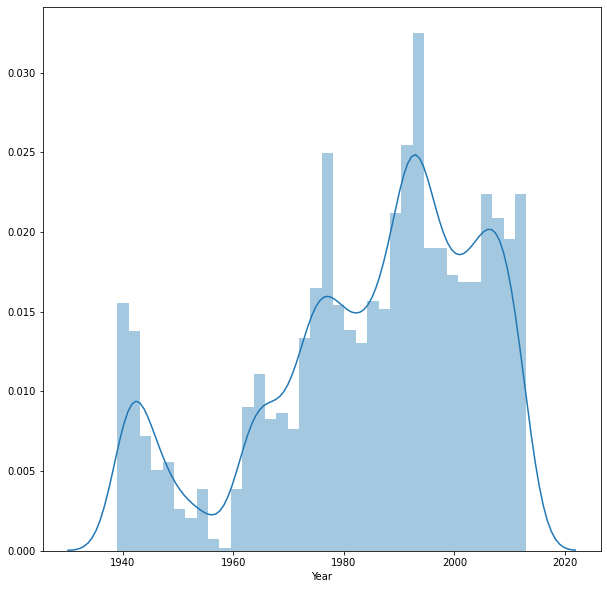

In [103]:
# для колонки Year
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Year'])

# Импьютация
#### Числовые данные
##### Выберем числовые колонки с пропущенными значениями

In [104]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка APPEARANCES. Тип данных float64. Количество пустых значений 1096, 6.69%.
Колонка Year. Тип данных float64. Количество пустых значений 815, 4.98%.


In [105]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,APPEARANCES,Year
0,4043.0,1962.0
1,3360.0,1941.0
2,3061.0,1974.0
3,2961.0,1963.0
4,2258.0,1950.0
...,...,...
16371,NaN,NaN
16372,NaN,NaN
16373,NaN,NaN
16374,NaN,NaN


In [106]:
# Фильтр по пустым значениям поля APPEARANCES 
data[data['ALIVE'].isnull()]

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
16293,541449,Mj7711,\/User:Mj7711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16329,714409,Sharjeel786,\/User:Sharjeel786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16347,462671,TOR\/test,\/User:TOR\/test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Запоминаем индексы строк с пустыми значениями


In [107]:
flt_index = data[data['APPEARANCES'].isnull()].index
flt_index

Int64Index([15280, 15281, 15282, 15283, 15284, 15285, 15286, 15287, 15288,
            15289,
            ...
            16366, 16367, 16368, 16369, 16370, 16371, 16372, 16373, 16374,
            16375],
           dtype='int64', length=1096)

In [108]:
data_num[data_num.index.isin(flt_index)]['APPEARANCES']

15280   NaN
15281   NaN
15282   NaN
15283   NaN
15284   NaN
         ..
16371   NaN
16372   NaN
16373   NaN
16374   NaN
16375   NaN
Name: APPEARANCES, Length: 1096, dtype: float64

In [109]:
data_num_MasVnrArea = data_num[['APPEARANCES']]
data_num_MasVnrArea.head()

,APPEARANCES
0,4043.0
1,3360.0
2,3061.0
3,2961.0
4,2258.0


In [0]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

# Фильтр для проверки заполнения пустых значений

In [111]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_MasVnrArea)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [0]:
strategies=['mean', 'median','most_frequent']

def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [113]:
data[['ALIVE']].describe()

,ALIVE
count,16373
unique,2
top,Living Characters
freq,12608


In [114]:
test_num_impute_col(data, 'APPEARANCES', strategies[0])

('APPEARANCES', 'mean', 1096, 17.033376963350786, 17.033376963350786)

In [115]:
test_num_impute_col(data, 'APPEARANCES', strategies[1])

('APPEARANCES', 'median', 1096, 3.0, 3.0)

In [116]:
test_num_impute_col(data, 'APPEARANCES', strategies[2])

('APPEARANCES', 'most_frequent', 1096, 1.0, 1.0)

#### Выберем категориальные колонки с пропущенными значениями
#### Цикл по колонкам датасета

In [117]:
cat_temp_data = data[['ALIGN']]
cat_temp_data.head()

,ALIGN
0,Good Characters
1,Good Characters
2,Neutral Characters
3,Good Characters
4,Good Characters


In [118]:
cat_temp_data['ALIGN'].unique()

array(['Good Characters', 'Neutral Characters', 'Bad Characters', nan],
      dtype=object)

In [119]:
cat_temp_data[cat_temp_data['ALIGN'].isnull()].shape

(2812, 1)

# Импьютация наиболее частыми значениями


In [120]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Good Characters'],
       ['Good Characters'],
       ['Neutral Characters'],
       ...,
       ['Bad Characters'],
       ['Neutral Characters'],
       ['Bad Characters']], dtype=object)

# Пустые значения отсутствуют

In [121]:
np.unique(data_imp2)

array(['Bad Characters', 'Good Characters', 'Neutral Characters'],
      dtype=object)

# Импьютация константой

In [122]:
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Good Characters'],
       ['Good Characters'],
       ['Neutral Characters'],
       ...,
       ['Bad Characters'],
       ['Neutral Characters'],
       ['Bad Characters']], dtype=object)

In [123]:
np.unique(data_imp3)

array(['!!!', 'Bad Characters', 'Good Characters', 'Neutral Characters'],
      dtype=object)

In [124]:
data_imp3[data_imp3=='!!!'].size

2812

**Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали?** -- удаление строк и колонок с пустыми значениями, заполнение всех пропущенных значений нулями, импьютацию для количественных признаков и для категориальных (импьютация наиболее частыми значениями и константой)

**Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?** -- для дальнейшего построения моделей будем использовать категориальные признаки со стратегиями "most_frequent" или "constant" для корректной работы класса SimpleImputer


## Масштабирование данных

In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [0]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Year']])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


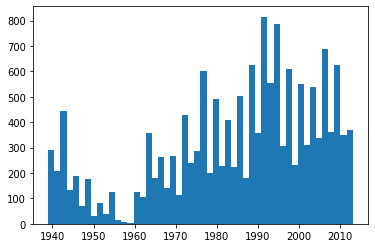

In [127]:
plt.hist(data['Year'], 50)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


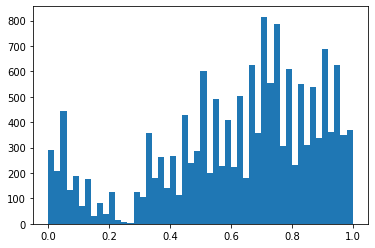

In [128]:
plt.hist(sc1_data, 50)
plt.show()

In [0]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Year']])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


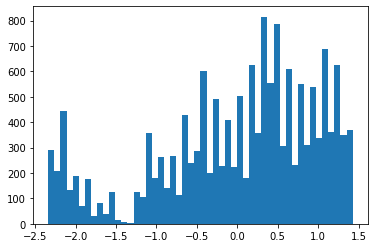

In [130]:
plt.hist(sc2_data, 50)
plt.show()

In [0]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data_new_2[['Year']])

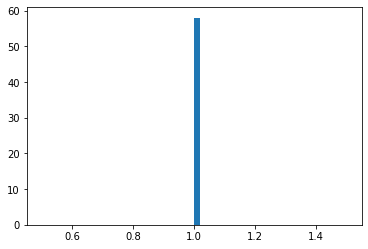

In [132]:
plt.hist(sc3_data, 50)
plt.show()

In [133]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Good Characters
1,Good Characters
2,Neutral Characters
3,Good Characters
4,Good Characters
...,...
16371,Bad Characters
16372,Good Characters
16373,Bad Characters
16374,Neutral Characters


In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [0]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [136]:
cat_enc['c1'].unique()

array(['Good Characters', 'Neutral Characters', 'Bad Characters'],
      dtype=object)

In [137]:
np.unique(cat_enc_le)

array([0, 1, 2])

In [138]:
le.inverse_transform([ 0,  1,  2])

array(['Bad Characters', 'Good Characters', 'Neutral Characters'],
      dtype=object)

In [0]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [140]:
cat_enc.shape

(16376, 1)

In [141]:
cat_enc_ohe.shape

(16376, 3)

In [142]:
cat_enc_ohe

<16376x3 sparse matrix of type '<class 'numpy.float64'>'
	with 16376 stored elements in Compressed Sparse Row format>

In [143]:
cat_enc_ohe.todense()[0:3]

matrix([[0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [144]:
cat_enc.head(3)

,c1
0,Good Characters
1,Good Characters
2,Neutral Characters


In [145]:
pd.get_dummies(cat_enc).head()

,c1_Bad Characters,c1_Good Characters,c1_Neutral Characters
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


In [146]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,ALIGN_Bad Characters,ALIGN_Good Characters,ALIGN_Neutral Characters,ALIGN_nan
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
